#  LaLiga Matches Analysis Project

##  INTRODUCTION
This project explores historical LaLiga match data to understand team performance,
goal statistics, and match trends.

LaLiga, also known as the Primera División, is one of the most prestigious football leagues in the world,
featuring iconic clubs such as Real Madrid, FC Barcelona, Atlético Madrid, and many others. The league
has a long history of thrilling matches, legendary players, and intense rivalries that attract global attention.

Analyzing LaLiga match data allows us to identify team performance patterns, understand goal scoring trends,
and explore the impact of home versus away advantages. Such insights can support coaches, analysts,
and enthusiasts in making strategic decisions or gaining a deeper appreciation for the game.


#  OUTCOMES

- Dataset cleaned (null columns removed)
- Goal distribution analyzed
- Home teams tend to score more on average
- Match results: Home wins are more frequent
- Full data report generated for in-depth profiling

##  PROBLEM STATEMENT
To uncover key patterns in LaLiga match data using statistical and visual analysis
to gain insights into team behavior, goal dynamics, and match outcomes.

## Import necessary libraries for data manipulation and visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, confusion_matrix, classification_report, accuracy_score

### LOAD DATA

In [2]:
df = pd.read_csv("LaLiga_Matches.csv")

### Loads the dataset into a DataFrame

### COLUMNS

In [3]:
print(df.columns)

Index(['Season', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR'],
      dtype='object')


### Display all column names in the dataset

### INFO

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10883 entries, 0 to 10882
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    10883 non-null  object 
 1   Date      10883 non-null  object 
 2   HomeTeam  10883 non-null  object 
 3   AwayTeam  10883 non-null  object 
 4   FTHG      10883 non-null  int64  
 5   FTAG      10883 non-null  int64  
 6   FTR       10883 non-null  object 
 7   HTHG      10881 non-null  float64
 8   HTAG      10881 non-null  float64
 9   HTR       10881 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 850.4+ KB


### Print concise summary of the DataFrame including datatypes and non-null values

# DATA TYPES

In [5]:

print(df.dtypes)

Season       object
Date         object
HomeTeam     object
AwayTeam     object
FTHG          int64
FTAG          int64
FTR          object
HTHG        float64
HTAG        float64
HTR          object
dtype: object


### HEAD

print(df.head())

### Show the first five rows of the dataset to preview the data structure

### TAIL

In [6]:
print(df.tail())

        Season        Date    HomeTeam  AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
10878  2023-24  01-10-2023     Almeria   Granada     3     3   D   3.0   0.0   
10879  2023-24  01-10-2023      Alaves   Osasuna     0     2   A   0.0   1.0   
10880  2023-24  01-10-2023  Ath Madrid     Cadiz     3     2   H   1.0   2.0   
10881  2023-24  01-10-2023       Betis  Valencia     3     0   H   1.0   0.0   
10882  2023-24  02-10-2023  Las Palmas     Celta     2     1   H   0.0   0.0   

      HTR  
10878   H  
10879   A  
10880   A  
10881   H  
10882   D  


### Show the last five rows of the dataset

### SHAPE

In [7]:
 df.shape

(10883, 10)

### Display the number of rows and columns in the dataset

### DUPLICATES

In [8]:
df.duplicated().sum()
df.isnull().sum()
 

Season      0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        2
HTAG        2
HTR         2
dtype: int64

### Check for duplicate rows in the dataset

### Check for null values in each column

## FILLNA

In [9]:

df.fillna(0, inplace=True)

### Fill missing values (if any) with a default value such as 0 or a placeholder
### This helps in preserving columns instead of dropping them

### DESCRIBE

In [10]:
df.describe()

,FTHG,FTAG,HTHG,HTAG
count,10883.000000,10883.000000,10883.000000,10883.000000
mean,1.553340,1.116971,0.687586,0.484701
std,1.303854,1.114065,0.840517,0.699739
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000
max,10.000000,8.000000,6.000000,6.000000


### Generate summary statistics for numerical columns

### CORRELATION

In [11]:
df.corr(numeric_only=True)

,FTHG,FTAG,HTHG,HTAG
FTHG,1.000000,-0.034694,0.690890,0.004042
FTAG,-0.034694,1.000000,-0.021619,0.680054
HTHG,0.690890,-0.021619,1.000000,-0.012971
HTAG,0.004042,0.680054,-0.012971,1.000000


### Display correlation matrix between numerical features

## FEATURE COMSTRUCTION

In [12]:
df['TotalGoals'] = df['FTHG'] + df['FTAG']
df['LogGoals'] = np.log1p(df['TotalGoals'])
df['GoalProduct'] = df['FTHG'] * df['FTAG']
df['GoalBin'] = pd.cut(df['TotalGoals'], bins=[-1,1,3,5,10], labels=['Low','Medium','High','Very High'])
df['GoalDiff'] = df['FTHG'] - df['FTAG']
df

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,TotalGoals,LogGoals,GoalProduct,GoalBin,GoalDiff
0,1995-96,02-09-1995,La Coruna,Valencia,3,0,H,2.0,0.0,H,3,1.386294,0,Medium,3
1,1995-96,02-09-1995,Sp Gijon,Albacete,3,0,H,3.0,0.0,H,3,1.386294,0,Medium,3
2,1995-96,03-09-1995,Ath Bilbao,Santander,4,0,H,2.0,0.0,H,4,1.609438,0,High,4
3,1995-96,03-09-1995,Ath Madrid,Sociedad,4,1,H,1.0,1.0,D,5,1.791759,4,High,3
4,1995-96,03-09-1995,Celta,Compostela,0,1,A,0.0,0.0,D,1,0.693147,0,Low,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10878,2023-24,01-10-2023,Almeria,Granada,3,3,D,3.0,0.0,H,6,1.945910,9,Very High,0
10879,2023-24,01-10-2023,Alaves,Osasuna,0,2,A,0.0,1.0,A,2,1.098612,0,Medium,-2
10880,2023-24,01-10-2023,Ath Madrid,Cadiz,3,2,H,1.0,2.0,A,5,1.791759,6,High,1
10881,2023-24,01-10-2023,Betis,Valencia,3,0,H,1.0,0.0,H,3,1.386294,0,Medium,3


In [13]:
df['SqrtGoals'] = np.sqrt(df['TotalGoals'])
df['SquaredDiff'] = df['GoalDiff'] ** 2
df

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,TotalGoals,LogGoals,GoalProduct,GoalBin,GoalDiff,SqrtGoals,SquaredDiff
0,1995-96,02-09-1995,La Coruna,Valencia,3,0,H,2.0,0.0,H,3,1.386294,0,Medium,3,1.732051,9
1,1995-96,02-09-1995,Sp Gijon,Albacete,3,0,H,3.0,0.0,H,3,1.386294,0,Medium,3,1.732051,9
2,1995-96,03-09-1995,Ath Bilbao,Santander,4,0,H,2.0,0.0,H,4,1.609438,0,High,4,2.000000,16
3,1995-96,03-09-1995,Ath Madrid,Sociedad,4,1,H,1.0,1.0,D,5,1.791759,4,High,3,2.236068,9
4,1995-96,03-09-1995,Celta,Compostela,0,1,A,0.0,0.0,D,1,0.693147,0,Low,-1,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10878,2023-24,01-10-2023,Almeria,Granada,3,3,D,3.0,0.0,H,6,1.945910,9,Very High,0,2.449490,0
10879,2023-24,01-10-2023,Alaves,Osasuna,0,2,A,0.0,1.0,A,2,1.098612,0,Medium,-2,1.414214,4
10880,2023-24,01-10-2023,Ath Madrid,Cadiz,3,2,H,1.0,2.0,A,5,1.791759,6,High,1,2.236068,1
10881,2023-24,01-10-2023,Betis,Valencia,3,0,H,1.0,0.0,H,3,1.386294,0,Medium,3,1.732051,9


In [14]:
df['Interaction_FTHG_FTAG'] = df['FTHG'] * df['FTAG']
df['Sum_Mean'] = df[['FTHG', 'FTAG']].mean(axis=1)
df.head

<bound method NDFrame.head of         Season        Date    HomeTeam    AwayTeam  FTHG  FTAG FTR  HTHG  \
0      1995-96  02-09-1995   La Coruna    Valencia     3     0   H   2.0   
1      1995-96  02-09-1995    Sp Gijon    Albacete     3     0   H   3.0   
2      1995-96  03-09-1995  Ath Bilbao   Santander     4     0   H   2.0   
3      1995-96  03-09-1995  Ath Madrid    Sociedad     4     1   H   1.0   
4      1995-96  03-09-1995       Celta  Compostela     0     1   A   0.0   
...        ...         ...         ...         ...   ...   ...  ..   ...   
10878  2023-24  01-10-2023     Almeria     Granada     3     3   D   3.0   
10879  2023-24  01-10-2023      Alaves     Osasuna     0     2   A   0.0   
10880  2023-24  01-10-2023  Ath Madrid       Cadiz     3     2   H   1.0   
10881  2023-24  01-10-2023       Betis    Valencia     3     0   H   1.0   
10882  2023-24  02-10-2023  Las Palmas       Celta     2     1   H   0.0   

       HTAG HTR  TotalGoals  LogGoals  GoalProduct    Goa

#  DATA VISUALIZATION

### 1. BARPLOT: Average goals by home team

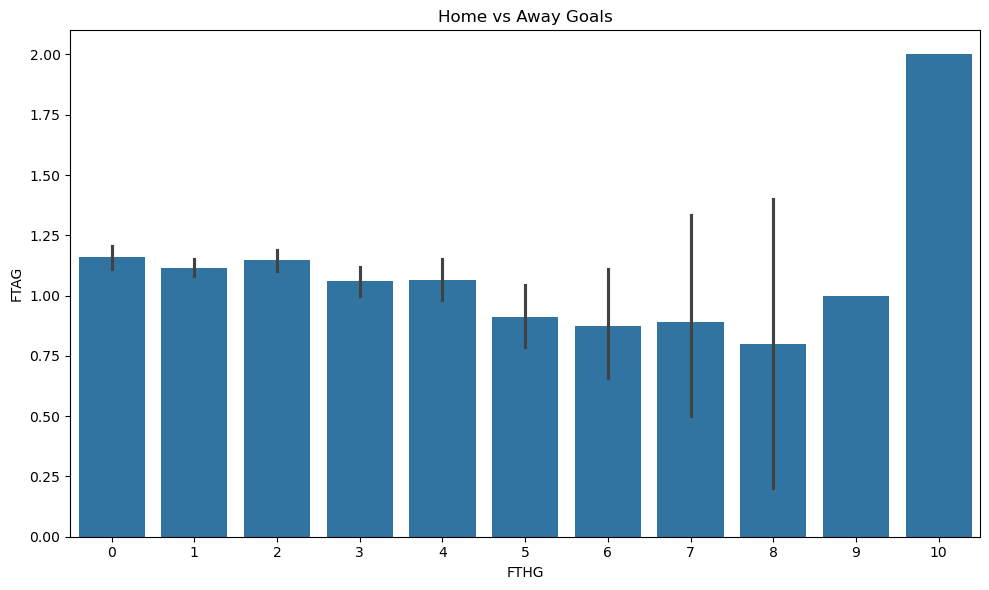

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x='FTHG', y='FTAG', data=df)
plt.title("Home vs Away Goals")
plt.tight_layout()
plt.show()


### >This barplot shows the average number of goals scored by each home team.
### >It helps identify which teams perform better offensively at their home stadiums.

### 2. HISTPLOT: Distribution of Full Time Home Goals

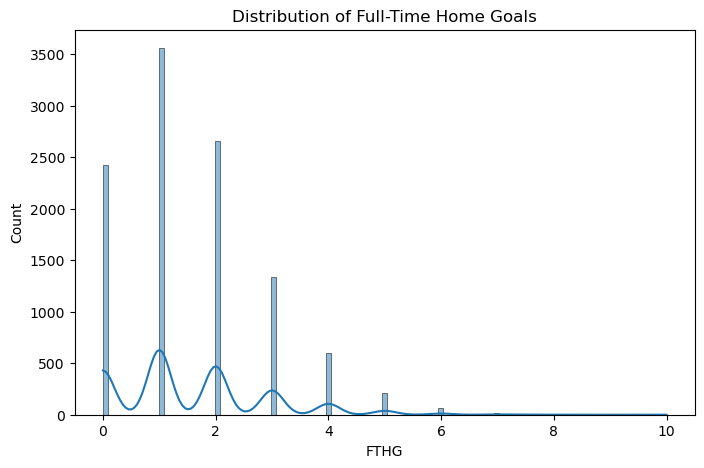

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df['FTHG'], kde=True)
plt.title("Distribution of Full-Time Home Goals")
plt.show()

### >This histogram shows how frequently different numbers of home goals occur in matches.
### >It provides insight into how often home teams score multiple goals and the most common goal counts.

## 3. BOXPLOT: Full Time Goals (Home vs Away)

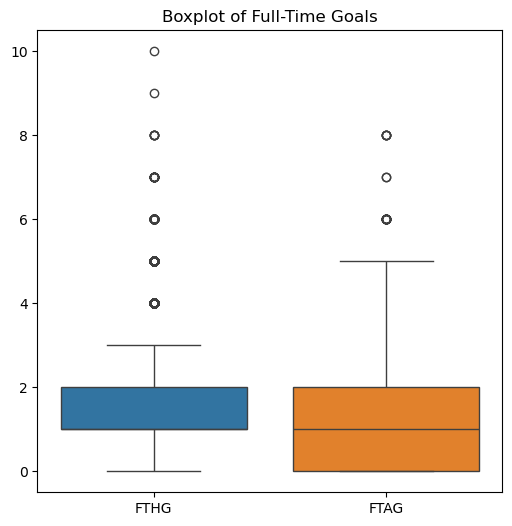

In [17]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df[['FTHG', 'FTAG']])
plt.title("Boxplot of Full-Time Goals")
plt.show()

### >This boxplot compares the distribution of home and away goals.
### >It shows medians, quartiles, and potential outliers, helping to identify scoring trends and home advantage.

## 4. PIE CHART: Match Result Distribution

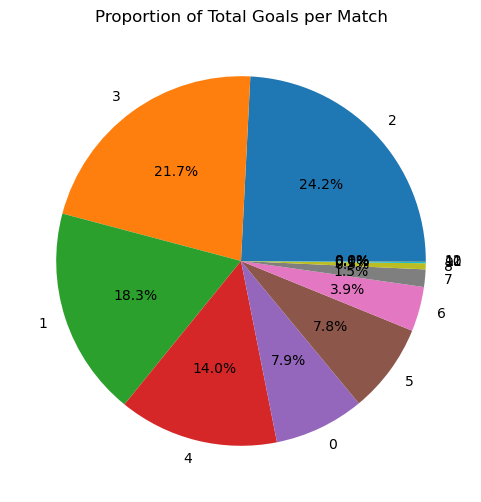

In [18]:
plt.figure(figsize=(6,6))
df['TotalGoals'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Proportion of Total Goals per Match")
plt.ylabel('')
plt.show()


### >This pie chart shows the proportion of match outcomes: home wins, draws, and away wins.
### >It visually represents which result is most common and indicates the strength of home field advantage.


## 5. Heatmap: Correlation Heatmap

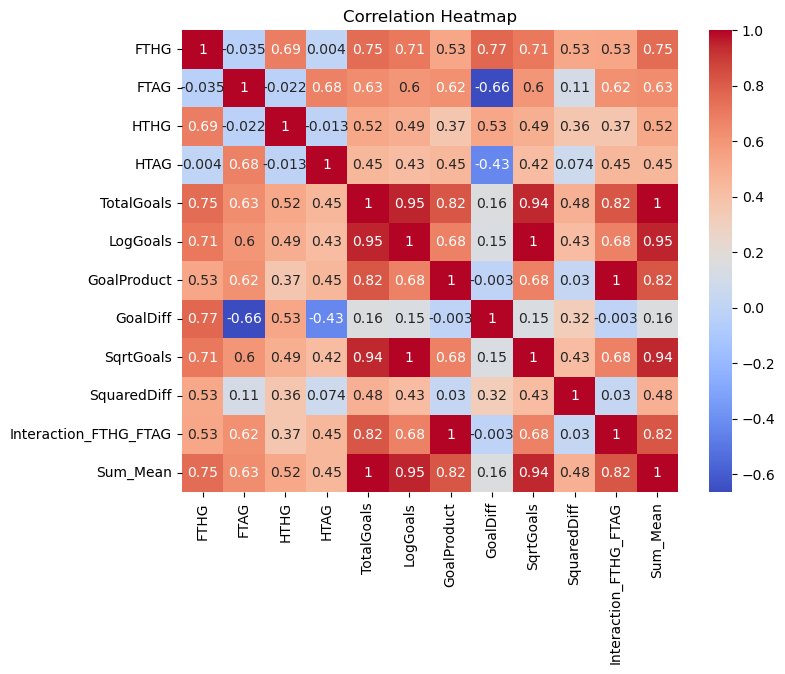

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### >This heatmap visualizes correlations between numerical variables. It helps to quickly spot strong relationships, such as between customer count and sales.

## 6. SCATTERPLOT: Home Goals vs Away Goals

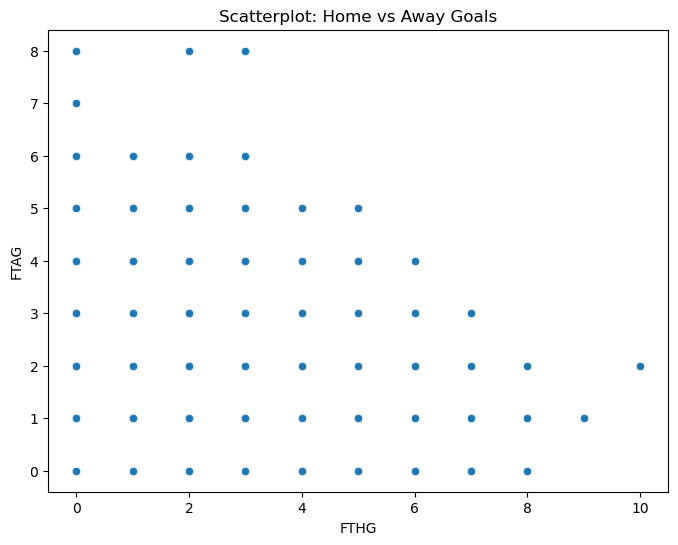

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='FTHG', y='FTAG', data=df)
plt.title("Scatterplot: Home vs Away Goals")
plt.show()

#### >This scatterplot shows the relationship between home goals and away goals in each match.
### >It helps identify whether matches with high home goals also tend to have high away goals or vice versa.

# Label Encoding

In [21]:
df.head()

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,TotalGoals,LogGoals,GoalProduct,GoalBin,GoalDiff,SqrtGoals,SquaredDiff,Interaction_FTHG_FTAG,Sum_Mean
0,1995-96,02-09-1995,La Coruna,Valencia,3,0,H,2.0,0.0,H,3,1.386294,0,Medium,3,1.732051,9,0,1.5
1,1995-96,02-09-1995,Sp Gijon,Albacete,3,0,H,3.0,0.0,H,3,1.386294,0,Medium,3,1.732051,9,0,1.5
2,1995-96,03-09-1995,Ath Bilbao,Santander,4,0,H,2.0,0.0,H,4,1.609438,0,High,4,2.000000,16,0,2.0
3,1995-96,03-09-1995,Ath Madrid,Sociedad,4,1,H,1.0,1.0,D,5,1.791759,4,High,3,2.236068,9,4,2.5
4,1995-96,03-09-1995,Celta,Compostela,0,1,A,0.0,0.0,D,1,0.693147,0,Low,-1,1.000000,1,0,0.5


In [22]:
df.isnull().sum()

Season                   0
Date                     0
HomeTeam                 0
AwayTeam                 0
FTHG                     0
FTAG                     0
FTR                      0
HTHG                     0
HTAG                     0
HTR                      0
TotalGoals               0
LogGoals                 0
GoalProduct              0
GoalBin                  2
GoalDiff                 0
SqrtGoals                0
SquaredDiff              0
Interaction_FTHG_FTAG    0
Sum_Mean                 0
dtype: int64

##  UNIQUE VALUES IN ENCODED COLUMN

### Display the unique encoded values and their mapping

In [23]:
df['HomeTeam'].unique()

array(['La Coruna', 'Sp Gijon', 'Ath Bilbao', 'Ath Madrid', 'Celta',
       'Espanol', 'Merida', 'Sevilla', 'Valladolid', 'Vallecano',
       'Zaragoza', 'Albacete', 'Barcelona', 'Betis', 'Real Madrid',
       'Compostela', 'Oviedo', 'Salamanca', 'Santander', 'Sociedad',
       'Tenerife', 'Valencia', 'Hercules', 'Logrones', 'Extremadura',
       'Mallorca', 'Alaves', 'Villareal', 'Malaga', 'Numancia',
       'Las Palmas', 'Osasuna', 'Villarreal', 'Recreativo', 'Murcia',
       'Getafe', 'Levante', 'Cadiz', 'Gimnastic', 'Almeria', 'Xerez',
       'Granada', 'Elche', 'Eibar', 'Cordoba', 'Leganes', 'Girona',
       'Huesca'], dtype=object)

## LABEL ENCODING (SINGLE COLUMN)

### Encode a single categorical column (e.g., 'HomeTeam')

In [24]:
le = LabelEncoder()
df['HomeTeam'] = le.fit_transform(df['HomeTeam'])

df.head()

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,TotalGoals,LogGoals,GoalProduct,GoalBin,GoalDiff,SqrtGoals,SquaredDiff,Interaction_FTHG_FTAG,Sum_Mean
0,1995-96,02-09-1995,21,Valencia,3,0,H,2.0,0.0,H,3,1.386294,0,Medium,3,1.732051,9,0,1.5
1,1995-96,02-09-1995,39,Albacete,3,0,H,3.0,0.0,H,3,1.386294,0,Medium,3,1.732051,9,0,1.5
2,1995-96,03-09-1995,3,Santander,4,0,H,2.0,0.0,H,4,1.609438,0,High,4,2.000000,16,0,2.0
3,1995-96,03-09-1995,4,Sociedad,4,1,H,1.0,1.0,D,5,1.791759,4,High,3,2.236068,9,4,2.5
4,1995-96,03-09-1995,8,Compostela,0,1,A,0.0,0.0,D,1,0.693147,0,Low,-1,1.000000,1,0,0.5


In [25]:
df['HomeTeam'].unique()

array([21, 39,  3,  4,  8, 13, 28, 37, 42, 43, 47,  1,  5,  6, 33,  9, 32,
       35, 36, 38, 40, 41, 19, 25, 14, 27,  0, 44, 26, 30, 22, 31, 45, 34,
       29, 15, 24,  7, 16,  2, 46, 18, 12, 11, 10, 23, 17, 20])

## VALUE COUNTS

In [26]:
df['HomeTeam'].value_counts()

HomeTeam
5     540
3     540
41    540
33    539
13    517
4     501
38    484
37    483
6     464
8     426
45    422
21    403
31    365
27    364
15    346
42    346
26    323
36    308
47    308
43    274
24    266
0     232
18    175
39    175
2     138
11    133
32    118
40    118
22     99
12     95
7      80
30     76
34     76
23     76
17     61
9      61
35     59
1      59
14     40
19     40
28     40
29     38
20     38
25     21
16     19
46     19
44     19
10     19
Name: count, dtype: int64

In [27]:
df.dtypes

Season                     object
Date                       object
HomeTeam                    int32
AwayTeam                   object
FTHG                        int64
FTAG                        int64
FTR                        object
HTHG                      float64
HTAG                      float64
HTR                        object
TotalGoals                  int64
LogGoals                  float64
GoalProduct                 int64
GoalBin                  category
GoalDiff                    int64
SqrtGoals                 float64
SquaredDiff                 int64
Interaction_FTHG_FTAG       int64
Sum_Mean                  float64
dtype: object

In [28]:
one_hot = pd.get_dummies(df , columns=['FTR'], drop_first = True)

In [29]:
df.head()

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,TotalGoals,LogGoals,GoalProduct,GoalBin,GoalDiff,SqrtGoals,SquaredDiff,Interaction_FTHG_FTAG,Sum_Mean
0,1995-96,02-09-1995,21,Valencia,3,0,H,2.0,0.0,H,3,1.386294,0,Medium,3,1.732051,9,0,1.5
1,1995-96,02-09-1995,39,Albacete,3,0,H,3.0,0.0,H,3,1.386294,0,Medium,3,1.732051,9,0,1.5
2,1995-96,03-09-1995,3,Santander,4,0,H,2.0,0.0,H,4,1.609438,0,High,4,2.000000,16,0,2.0
3,1995-96,03-09-1995,4,Sociedad,4,1,H,1.0,1.0,D,5,1.791759,4,High,3,2.236068,9,4,2.5
4,1995-96,03-09-1995,8,Compostela,0,1,A,0.0,0.0,D,1,0.693147,0,Low,-1,1.000000,1,0,0.5


## ONE HOT ENCODING EXAMPLE (USING get_dummies)

In [30]:
one_hot = pd.get_dummies(df['AwayTeam'], prefix='AwayTeam')
df = pd.concat([df, one_hot], axis=1)

In [31]:
df['AwayTeam'].value_counts()

AwayTeam
Real Madrid    541
Valencia       540
Barcelona      540
Ath Bilbao     540
Espanol        517
Ath Madrid     502
Sevilla        482
Sociedad       482
Betis          464
Celta          426
Villarreal     422
La Coruna      403
Mallorca       366
Osasuna        365
Getafe         346
Valladolid     346
Malaga         323
Zaragoza       308
Santander      308
Vallecano      274
Levante        266
Alaves         232
Granada        175
Sp Gijon       175
Almeria        136
Eibar          133
Oviedo         118
Tenerife       118
Las Palmas      99
Elche           95
Cadiz           80
Leganes         76
Numancia        76
Recreativo      76
Girona          61
Compostela      61
Albacete        59
Salamanca       59
Hercules        40
Extremadura     40
Merida          40
Murcia          38
Huesca          38
Logrones        21
Gimnastic       19
Xerez           19
Villareal       19
Cordoba         19
Name: count, dtype: int64

## OUTLIERS DETECTION

In [32]:
q1 = df['FTHG'].quantile(0.25)
q3 = df['FTHG'].quantile(0.75)
iqr = q3 - q1
lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr
outliers = df[(df['FTHG'] < lb) | (df['FTHG'] > ub)]
#remove outliers
df = df[(df['FTHG'] >= lb) & (df['FTHG'] <= ub)]
outliers.shape
print("New dataset shape after removing outliers:", df.shape)

New dataset shape after removing outliers: (9985, 67)



# WITH SCALING FEATUR

In [33]:
numeric_df = df.select_dtypes(include=np.number)
scaler = StandardScaler()
scaled = scaler.fit_transform(numeric_df)

In [34]:
scaler

StandardScaler()

In [35]:
X = numeric_df.drop(columns=['GoalDiff'])
y = numeric_df['GoalDiff']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
X_train

,HomeTeam,FTHG,FTAG,HTHG,HTAG,TotalGoals,LogGoals,GoalProduct,SqrtGoals,SquaredDiff,Interaction_FTHG_FTAG,Sum_Mean
3642,36,0,0,0.0,0.0,0,0.000000,0,0.000000,0,0,0.0
3660,36,1,0,1.0,0.0,1,0.693147,0,1.000000,1,0,0.5
4370,36,0,3,0.0,1.0,3,1.386294,0,1.732051,9,0,1.5
2704,21,1,0,1.0,0.0,1,0.693147,0,1.000000,1,0,0.5
2483,47,0,1,0.0,1.0,1,0.693147,0,1.000000,1,0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
6228,15,2,0,0.0,0.0,2,1.098612,0,1.414214,4,0,1.0
5637,2,1,0,0.0,0.0,1,0.693147,0,1.000000,1,0,0.5
5852,45,2,0,2.0,0.0,2,1.098612,0,1.414214,4,0,1.0
944,3,1,0,1.0,0.0,1,0.693147,0,1.000000,1,0,0.5


In [37]:
X_test

,HomeTeam,FTHG,FTAG,HTHG,HTAG,TotalGoals,LogGoals,GoalProduct,SqrtGoals,SquaredDiff,Interaction_FTHG_FTAG,Sum_Mean
9645,3,0,2,0.0,0.0,2,1.098612,0,1.414214,4,0,1.0
6029,4,0,0,0.0,0.0,0,0.000000,0,0.000000,0,0,0.0
8504,31,2,1,1.0,1.0,3,1.386294,2,1.732051,1,2,1.5
396,5,1,3,1.0,1.0,4,1.609438,3,2.000000,4,3,2.0
5377,15,2,1,0.0,0.0,3,1.386294,2,1.732051,1,2,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...
10279,13,2,2,1.0,1.0,4,1.609438,4,2.000000,0,4,2.0
8877,4,0,2,0.0,0.0,2,1.098612,0,1.414214,4,0,1.0
7681,3,1,1,0.0,0.0,2,1.098612,1,1.414214,0,1,1.0
4995,21,1,0,0.0,0.0,1,0.693147,0,1.000000,1,0,0.5


# LinearRegression

<Figure size 1200x600 with 0 Axes>

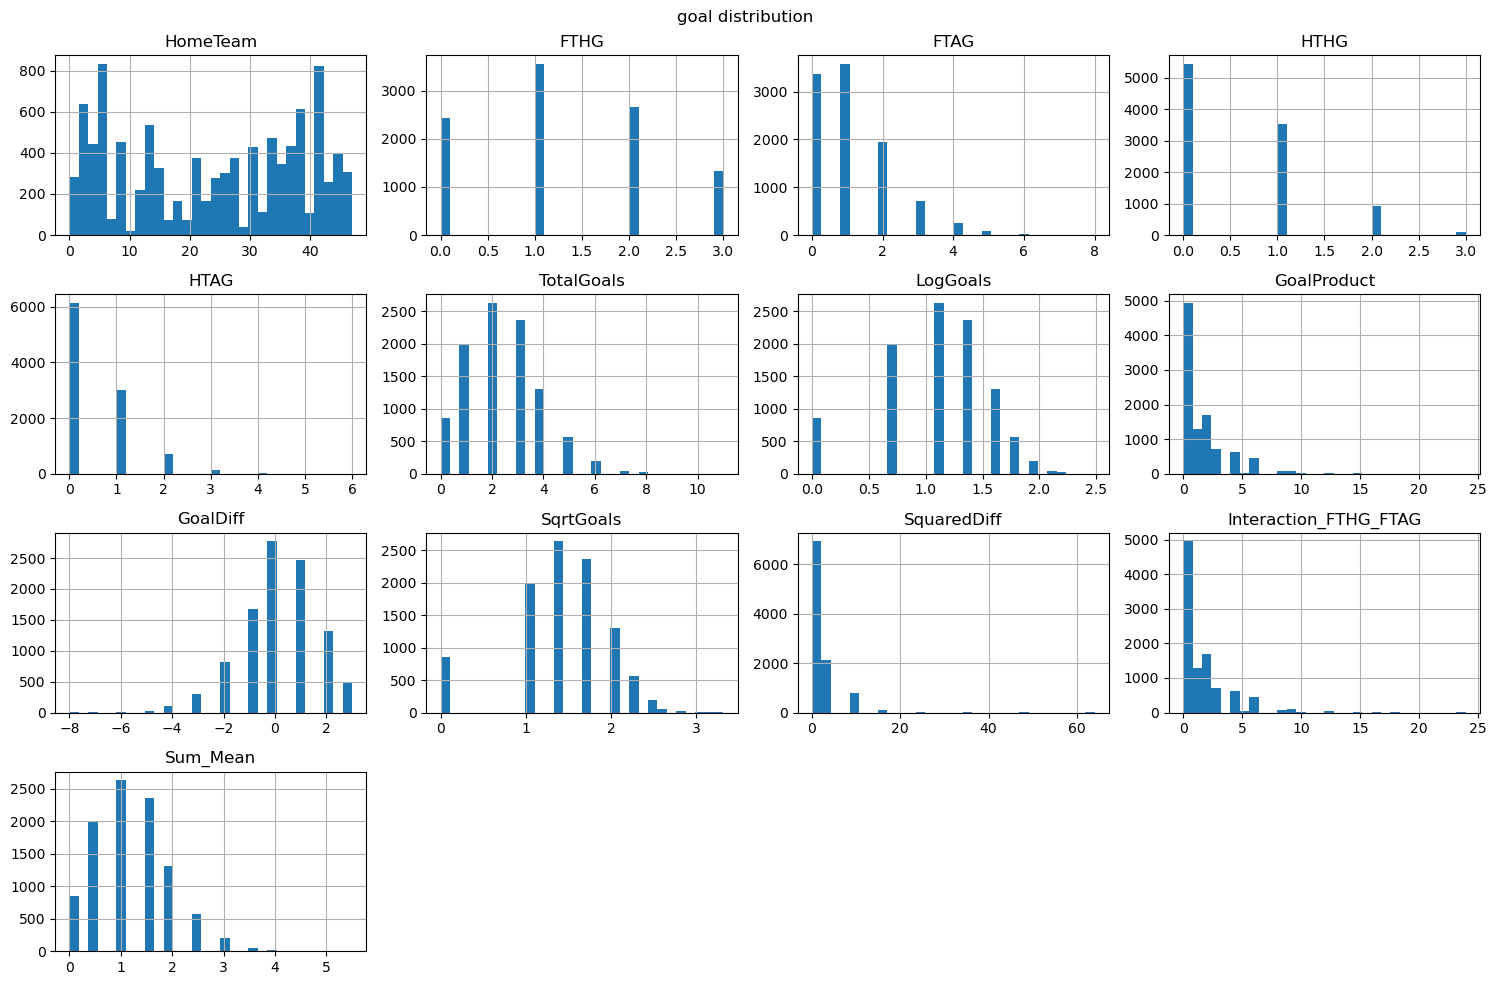

In [38]:
plt.figure(figsize=(12,6))
df.hist(bins=30, figsize=(15,10))
plt.suptitle("goal distribution")
plt.tight_layout()
plt.show()

In [39]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("categorical columns:", cat_cols)

categorical columns: ['Season', 'Date', 'AwayTeam', 'FTR', 'HTR']


In [40]:
df.drop(columns = ['Season', 'Date', 'AwayTeam', 'FTR', 'HTR'], inplace=True)

In [41]:
df.head()

,HomeTeam,FTHG,FTAG,HTHG,HTAG,TotalGoals,LogGoals,GoalProduct,GoalBin,GoalDiff,...,AwayTeam_Sociedad,AwayTeam_Sp Gijon,AwayTeam_Tenerife,AwayTeam_Valencia,AwayTeam_Valladolid,AwayTeam_Vallecano,AwayTeam_Villareal,AwayTeam_Villarreal,AwayTeam_Xerez,AwayTeam_Zaragoza
0,21,3,0,2.0,0.0,3,1.386294,0,Medium,3,...,False,False,False,True,False,False,False,False,False,False
1,39,3,0,3.0,0.0,3,1.386294,0,Medium,3,...,False,False,False,False,False,False,False,False,False,False
4,8,0,1,0.0,0.0,1,0.693147,0,Low,-1,...,False,False,False,False,False,False,False,False,False,False
5,13,3,1,2.0,1.0,4,1.609438,3,High,2,...,False,False,False,False,False,False,False,False,False,False
6,28,1,1,1.0,1.0,2,1.098612,1,Medium,0,...,False,False,False,False,False,False,False,False,False,False


In [42]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
r2_score(y_test, lr_pred)
mean_absolute_error(y_test, lr_pred)
mean_squared_error(y_test, lr_pred)
np.sqrt(mean_squared_error(y_test, lr_pred))

3.555623001146668e-15

In [43]:
lr

LinearRegression()

In [44]:
float_cols = df.select_dtypes(include=['float64']).columns
float_cols = float_cols.drop('GoalDiff') if 'GoalDiff' in float_cols else float_cols
X_float = df[float_cols]
y_float = df['GoalDiff']
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X_float, y_float, test_size=0.2, random_state=42)

In [45]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(Xf_train, yf_train)
dt_pred = dt.predict(Xf_test)
r2_score(yf_test, dt_pred)

0.4292372053703404

In [46]:
lr.coef_

array([-2.15814703e-16,  1.00000000e+00, -1.00000000e+00,  8.22258928e-16,
       -9.43689571e-16, -1.38777878e-15,  6.53643806e-15, -3.88578059e-16,
       -3.33066907e-15, -6.93889390e-18,  1.16573418e-15, -1.11022302e-16])

In [47]:
lr.intercept_


7.716050021144838e-15

# Logistic Regression

In [2]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(Xc_train, yc_train)

NameError: name 'LogisticRegression' is not defined

## Random Forest

In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
r2_score(y_test, rf_pred)

In [ ]:
sample = X_test.iloc[:5]
rf.predict(sample)

In [ ]:
mean_absolute_error(y_test, rf_pred)
mean_squared_error(y_test, rf_pred)

In [ ]:
y_class = df['GoalBin'].astype(str)

if 'GoalDiff' in df.select_dtypes(include=['float64']).columns:
    X_class = df.select_dtypes(include=['float64']).drop(columns=['GoalDiff'])
else:
    X_class = df.select_dtypes(include=['float64'])

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(Xc_train, yc_train)
yc_pred = classifier.predict(Xc_test)

confusion_matrix(yc_test, yc_pred)
classification_report(yc_test, yc_pred)


## Plotting a decision tree


In [1]:
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X_float.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for GoalDiff Prediction")
plt.show()

NameError: name 'plt' is not defined

#  CONCLUSION
Through the analysis of LaLiga match data, we gained valuable insights into team performances,
goal-scoring trends, and match results. The results show a clear home advantage across many teams,
and we observed meaningful patterns in goal distribution.

By performing data cleaning, statistical analysis, and visualization, we made the dataset more insightful
band easier to understand. This kind of analysis can be helpful for coaches, fans, analysts, and sports journalists
who want to explore the dynamics of one of the most competitive football leagues in the world.

Future analysis could include player-level performance, match timing effects, and predictive modeling
to forecast future outcomes based on historical data.
